In [17]:
!pip install -U scikit-learn
!pip install matplotlib
!pip install seaborn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Sample data
data = {
    'text': [
        'i will never feel completely content i will always long for more',
        'i was feeling extremely generous last night so my companion ate double and i just told the lion in my stomach to pipe it',
        'i suppose because there is so much to do i feel over burdened',
        'i feel strong confident intelligent and ready to step out into the real world',
        'i know how you feel about being shy',
    ],
    'label': [1, 1, 0, 1, 4]
}

In [19]:
# Create DataFrame
model=pd.read_csv("text.csv")

In [20]:
model.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [21]:
model.tail()

,Unnamed: 0,text,label
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3
416808,416808,i think that after i had spent some time inves...,5


In [22]:
model["text"].unique()

array(['i just feel really helpless and heavy hearted',
       'ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing',
       'i gave up my internship with the dmrg and am feeling distraught',
       ...,
       'i feel very curious be why previous early dawn in the time here don t you seek his trouble',
       'i feel that becuase of the tyranical nature of the government in el salvador and the savage social conditions of the general people that the set of thought to run the shoe shop in miguel marmols testimoney was able to work',
       'i think that after i had spent some time investigating the surroundings and things i started to feel more curious about other people'],
      dtype=object)

In [23]:
model.corr(numeric_only=True)

,Unnamed: 0,label
Unnamed: 0,1.000000,0.002782
label,0.002782,1.000000


In [24]:
numeric_data=model.select_dtypes(include=np.number).columns
numeric_data

Index(['Unnamed: 0', 'label'], dtype='object')

In [25]:
df = pd.DataFrame(model)


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

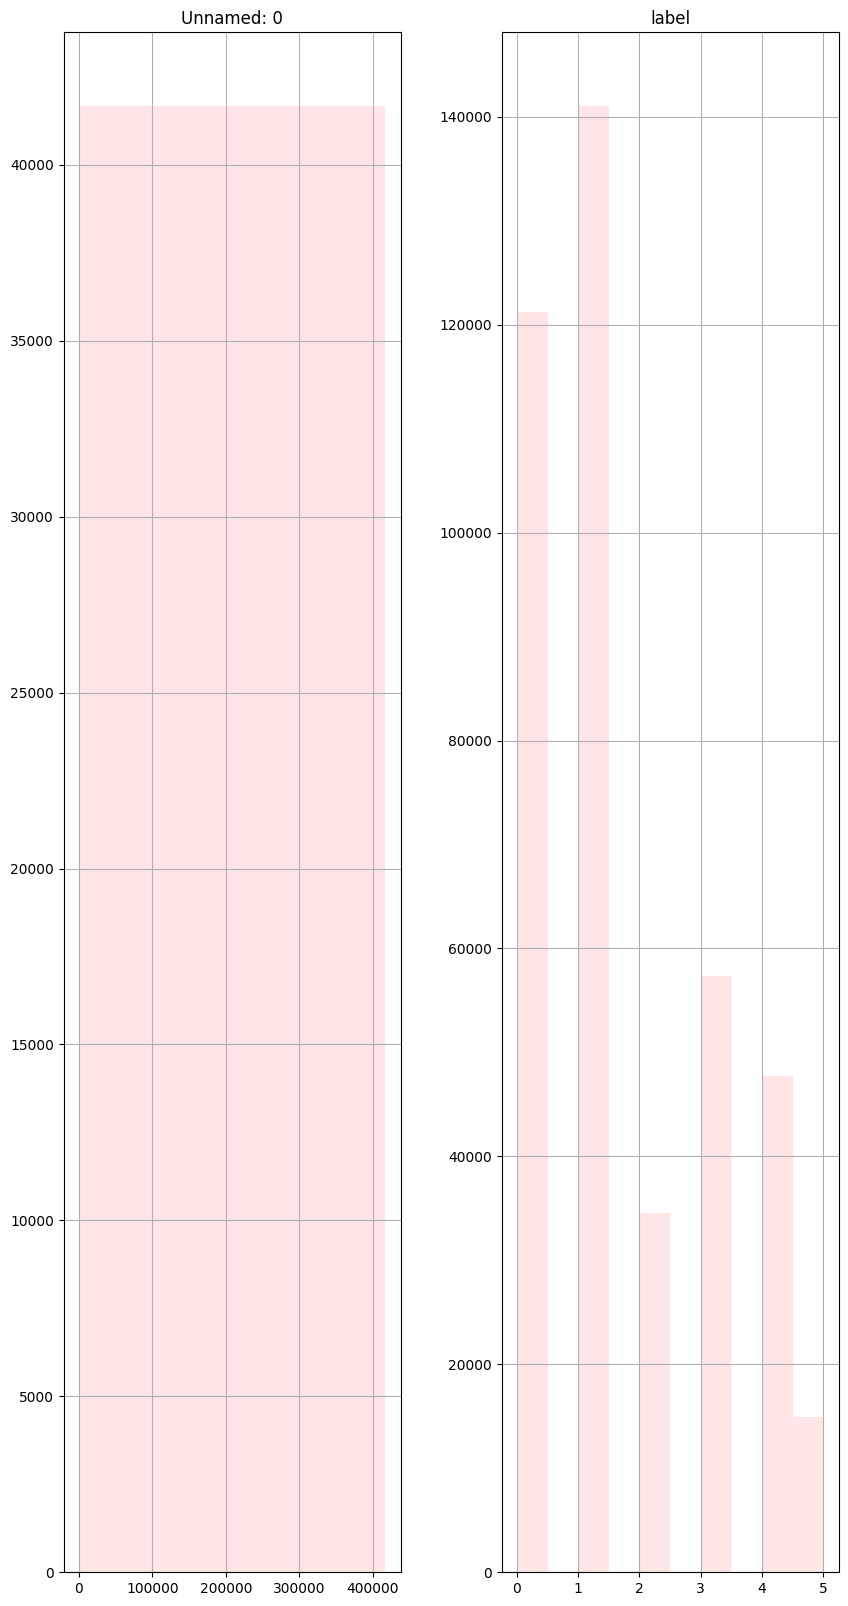

In [26]:
df.hist(
    grid = True,
    figsize=(10,20),
    alpha=0.1,
    bins=10,
    color="r",
)

<Axes: ylabel='label'>

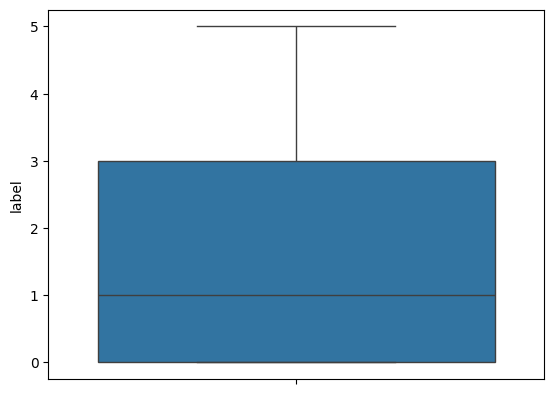

In [27]:
sns.boxplot(model["label"])

In [28]:
# Split features and target
X = df['text']
y = df['label']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [31]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [35]:
# Function to predict emotion
def predict_emotion(text):
    try:
        # Vectorize the input text
        text_vectorized = vectorizer.transform([text])
        
        # Predict
        prediction = model.predict(text_vectorized)[0]
        
        # Map numerical labels to emotions
        emotion_map = {
            0: "confuse",
            1: "relaxed",
            2: "positive",
            3: "guilt",
            4: "negative"
        }
        
        return emotion_map.get(prediction, "Unknown")
    
    except Exception as e:
        return f"Error occurred: {str(e)}"

In [36]:
# Test the model
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.90


In [37]:
while True:
    test_text = input("Enter your text or 'q' to quit: ")
    if test_text.lower() == 'q':
        break
    predicted_emotion = predict_emotion(test_text)
    print(f"Text: {test_text}")
    print(f"Predicted Emotion: {predicted_emotion}\n")

Enter your text or 'q' to quit:  	text 212	i feel heartless as i pass them by knowing that giving them money will only invite more trouble


Text: 	text 212	i feel heartless as i pass them by knowing that giving them money will only invite more trouble
Predicted Emotion: guilt



Enter your text or 'q' to quit:  	text 210	i feel is an important part of the grieving and healing process


Text: 	text 210	i feel is an important part of the grieving and healing process
Predicted Emotion: relaxed



Enter your text or 'q' to quit:  Sitting by the shore, listening to the gentle waves, you feel a deep sense of peace and calm


Text: Sitting by the shore, listening to the gentle waves, you feel a deep sense of peace and calm
Predicted Emotion: positive



Enter your text or 'q' to quit:  The day felt strangely empty, with an unusual stillness hanging in the air


Text: The day felt strangely empty, with an unusual stillness hanging in the air
Predicted Emotion: confuse



Enter your text or 'q' to quit:  q
